#Framework for Data Preparation Techniques in Machine Learning

There are a vast number of different types of data preparation techniques that could be used on a predictive modeling project.

In some cases, the distribution of the data or the requirements of a machine learning model may suggest the data preparation needed, although this is rarely the case given the complexity and high-dimensionality of the data, the ever-increasing parade of new machine learning algorithms and limited, although human, limitations of the practitioner.

Instead, data preparation can be treated as another hyperparameter to tune as part of the modeling pipeline. This raises the question of how to know what data preparation methods to consider in the search, which can feel overwhelming to experts and beginners alike.

The solution is to think about the vast field of data preparation in a structured way and systematically evaluate data preparation techniques based on their effect on the raw data.

In this tutorial, you will discover a framework that provides a structured approach to both thinking about and grouping data preparation techniques for predictive modeling with structured data.

After completing this tutorial, you will know:

* The challenge and overwhelm of framing data preparation as yet an additional hyperparameter to tune in the machine learning modeling pipeline.
* A framework that defines five groups of data preparation techniques to consider.
* Examples of data preparation techniques that belong to each group that can be evaluated on your predictive modeling project.

##Tutorial Overview

This tutorial is divided into three parts; they are:

1. Challenge of Data Preparation
2. Framework for Data Preparation
3. Data Preparation Techniques





##Challenge of Data Preparation

Data preparation refers to transforming raw data into a form that is better suited to predictive modeling.

This may be required because the data itself contains mistakes or errors. It may also be because the chosen algorithms have expectations regarding the type and distribution of the data.

To make the task of data preparation even more challenging, it is also common that the data preparation required to get the best performance from a predictive model may not be obvious and may bend or violate the expectations of the model that is being used.

As such, it is common to treat the choice and configuration of data preparation applied to the raw data as yet another hyperparameter of the modeling pipeline to be tuned.

This framing of data preparation is very effective in practice, as it allows you to use automatic search techniques like grid search and random search to discover unintuitive data preparation steps that result in skillful predictive models.

This framing of data preparation can also feel overwhelming to beginners given the large number and variety of data preparation techniques.

The solution to this overwhelm is to think about data preparation techniques in a systematic way.

##Framework for Data Preparation
Effective data preparation requires that the data preparation techniques available are organized and considered in a structured and systematic way.

This allows you to ensure that approach techniques are explored for your dataset and that potentially effective techniques are not skipped or ignored.

This can be achieved using a framework to organize data preparation techniques that consider their effect on the raw dataset.

For example, structured machine learning data, such as data we might store in a CSV file for classification and regression, consists of rows, columns, and values. We might consider data preparation techniques that operate at each of these levels.

* Data Preparation for Rows
* Data Preparation for Columns
* Data Preparation for Values

Data preparation for rows may be techniques that add or remove rows of data from the dataset. Similarly, data preparation for columns may be techniques that add or remove columns (features or variables) from the dataset. Whereas data preparation for values may be techniques that change the values in the dataset, often for a given column.

There is one more type of data preparation that does not neatly fit into this structure, and that is dimensionality reduction techniques. These techniques change the columns and the values at the same time, e.g. projecting the data into a lower-dimensional space.

* Data Preparation for Columns + Values

This raises the question of techniques that might apply to rows and values at the same time. This might include data preparation that consolidates rows of data in some way.

* Data Preparation for Rows + Values

We can summarize this framework and some high-level groups of data preparation methods in the following image:

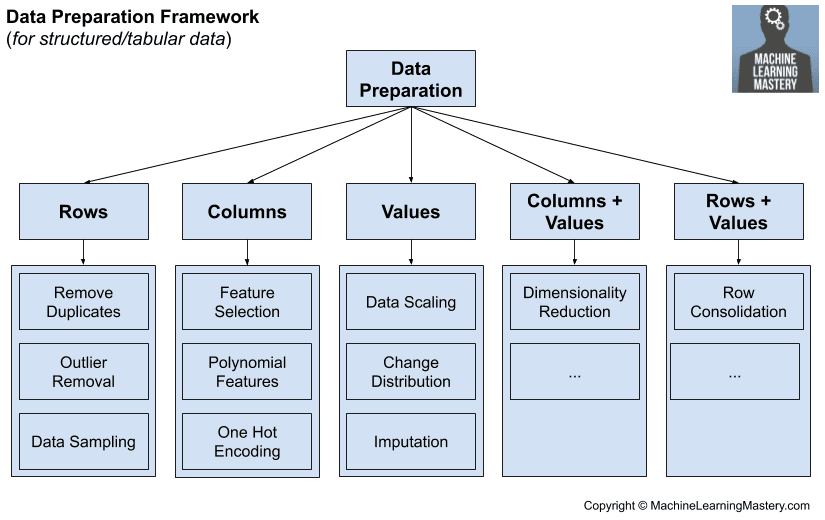

##Data Preparation Techniques

This section explores the five high-level groups of data preparation techniques defined in the previous section and suggests specific techniques that may fall within each group.

###Data Preparation for Rows

This group is for data preparation techniques that add or remove rows of data.

In machine learning, rows are often referred to as samples, examples, or instances.

These techniques are often used to augment a limited training dataset or to remove errors or ambiguity from the dataset.

The main class of techniques that come to mind are data preparation techniques that are often used for imbalanced classification.

This includes techniques such as SMOTE that create synthetic rows of training data for under-represented classes and random undersampling that remove examples for over-represented classes

####SMOTE for Imbalanced Classification with Python

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

After completing this section, you will know:

* How the SMOTE synthesizes new examples for the minority class.
* How to correctly fit and evaluate machine learning models on SMOTE-transformed training datasets.
* How to use extensions of the SMOTE that generate synthetic examples along the class decision boundary.

##### Section Overview

This section is divided into five parts; they are:

1. Synthetic Minority Oversampling Technique
2. Imbalanced-Learn Library
3. SMOTE for Balancing Data
4. SMOTE for Classification
5. SMOTE With Selective Synthetic Sample Generation
  * Borderline-SMOTE
  * Borderline-SMOTE SVM
  * Adaptive Synthetic Sampling (ADASYN)

#####Synthetic Minority Oversampling Technique

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

Now that we are familiar with the technique, let’s look at a worked example for an imbalanced classification problem.

#####Imbalanced-Learn Library

In these examples, we will use the implementations provided by the imbalanced-learn Python library, which can be installed via pip as follows:

In [2]:
import imblearn
print(imblearn.__version__)
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

0.10.1


#####SMOTE for Balancing Data

In this section, we will develop an intuition for the SMOTE by applying it to an imbalanced binary classification problem.

First, we can use the make_classification() scikit-learn function to create a synthetic binary classification dataset with 10,000 examples and a 1:100 class distribution.

In [3]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

In [4]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Finally, we can create a scatter plot of the dataset and color the examples for each class a different color to clearly see the spatial nature of the class imbalance.

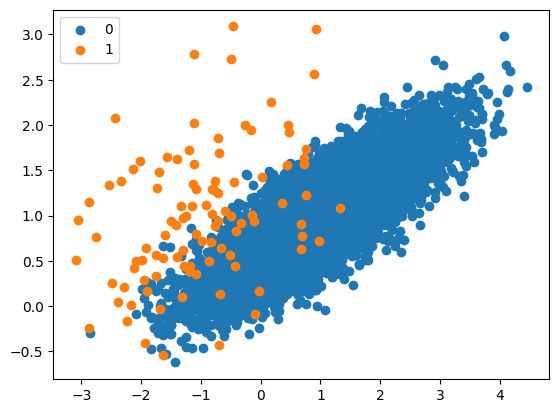

In [5]:
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first summarizes the class distribution, confirms the 1:100 ratio, in this case with about 9,900 examples in the majority class and 100 in the minority class.

In [6]:
Counter({0: 9900, 1: 100})

Counter({0: 9900, 1: 100})

A scatter plot of the dataset is created showing the large mass of points that belong to the majority class (blue) and a small number of points spread out for the minority class (orange). We can see some measure of overlap between the two classes. Next, we can oversample the minority class using SMOTE and plot the transformed dataset.

We can use the SMOTE implementation provided by the imbalanced-learn Python library in the SMOTE class.

The SMOTE class acts like a data transform object from scikit-learn in that it must be defined and configured, fit on a dataset, then applied to create a new transformed version of the dataset.

For example, we can define a SMOTE instance with default parameters that will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

In [7]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Once transformed, we can summarize the class distribution of the new transformed dataset, which would expect to now be balanced through the creation of many new synthetic examples in the minority class.

In [8]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


A scatter plot of the transformed dataset can also be created and we would expect to see many more examples for the minority class on lines between the original examples in the minority class.

Tying this together, the complete examples of applying SMOTE to the synthetic dataset and then summarizing and plotting the transformed result is listed below.

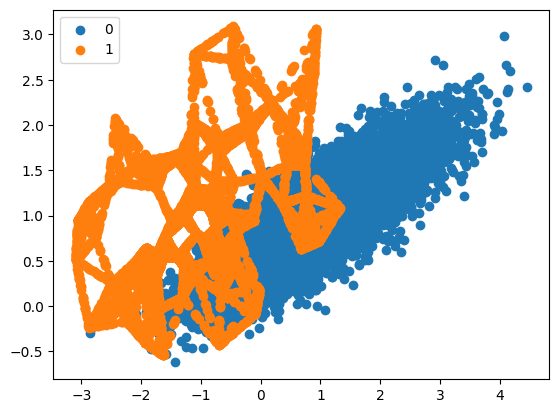

In [9]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first creates the dataset and summarizes the class distribution, showing the 1:100 ratio.

Then the dataset is transformed using the SMOTE and the new class distribution is summarized, showing a balanced distribution now with 9,900 examples in the minority class.

Finally, a scatter plot of the transformed dataset is created. It shows many more examples in the minority class created along the lines between the original examples in the minority class.

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; for example:

In [10]:
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

We can then chain these two transforms together into a Pipeline.

The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.

In [11]:
from imblearn.pipeline import Pipeline

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

The pipeline can then be fit and applied to our dataset just like a single transform: 


```
X, y = pipeline.fit_resample(X, y)
```



We can then summarize and plot the resulting dataset.

We would expect some SMOTE oversampling of the minority class, although not as much as before where the dataset was balanced. We also expect fewer examples in the majority class via random undersampling.

Tying this all together, the complete example is listed below.

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


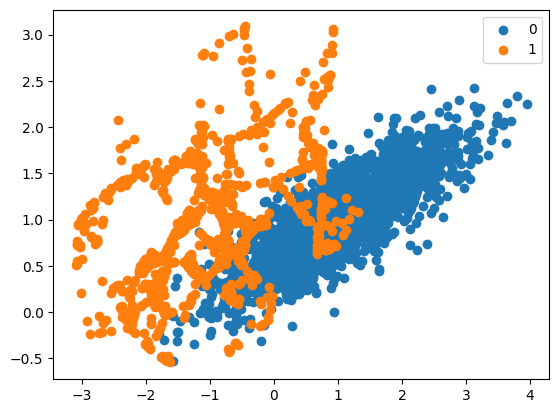

In [12]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Finally, a scatter plot of the transformed dataset is created, showing the oversampled minority class and the undersampled majority class. Running the example first creates the dataset and summarizes the class distribution.

Next, the dataset is transformed, first by oversampling the minority class, then undersampling the majority class. The final class distribution after this sequence of transforms matches our expectations with a 1:2 ratio or about 2,000 examples in the majority class and about 1,000 examples in the minority class.

In [ ]:
Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})

Counter({0: 1980, 1: 990})

Now that we are familiar with transforming imbalanced datasets, let’s look at using SMOTE when fitting and evaluating classification models.

##### SMOTE for Classification

In this section, we will look at how we can use SMOTE as a data preparation method when fitting and evaluating machine learning algorithms in scikit-learn.

First, we use our binary classification dataset from the previous section then fit and evaluate a decision tree algorithm.

The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified k-fold cross-validation to evaluate the model. We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.

The dataset is stratified, meaning that each fold of the cross-validation split will have the same class distribution as the original dataset, in this case, a 1:100 ratio. We will evaluate the model using the ROC area under curve (AUC) metric. This can be optimistic for severely imbalanced datasets but will still show a relative change with better performing models.

In [13]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

Once fit, we can calculate and report the mean of the scores across the folds and repeats.

In [14]:
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.915


**Note**: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Now, we can try the same model and the same evaluation method, although use a SMOTE transformed version of the dataset.

The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.

This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model.

In [15]:
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

This pipeline can then be evaluated using repeated k-fold cross-validation.

Tying this together, the complete example of evaluating a decision tree with SMOTE oversampling on the training dataset is listed below.

In [16]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.816


As mentioned in the paper, it is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

We can achieve this by simply adding a RandomUnderSampler step to the Pipeline.

As in the previous section, we will first oversample the minority class with SMOTE to about a 1:10 ratio, then undersample the majority class to achieve about a 1:2 ratio.

In [17]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.848


Running the example evaluates the model with the pipeline of SMOTE oversampling and random undersampling on the training dataset.

You could explore testing different ratios of the minority class and majority class (e.g. changing the sampling_strategy argument) to see if a further lift in performance is possible.

Another area to explore would be to test different values of the k-nearest neighbors selected in the SMOTE procedure when each new synthetic example is created. The default is k=5, although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

For example, we could grid search a range of values of k, such as values from 1 to 7, and evaluate the pipeline for each value.


```
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
 # define pipeline
```



In [18]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
 # define pipeline
 model = DecisionTreeClassifier()
 over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
 under = RandomUnderSampler(sampling_strategy=0.5)
 steps = [('over', over), ('under', under), ('model', model)]
 pipeline = Pipeline(steps=steps)
 # evaluate pipeline
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
 score = mean(scores)
 print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.836
> k=2, Mean ROC AUC: 0.832
> k=3, Mean ROC AUC: 0.842
> k=4, Mean ROC AUC: 0.833
> k=5, Mean ROC AUC: 0.839
> k=6, Mean ROC AUC: 0.839
> k=7, Mean ROC AUC: 0.851


Running the example will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by random undersampling and fitting a decision tree on the resulting training dataset.

The mean ROC AUC is reported for each configuration.

In this case, the results suggest that a k=3 might be good with a ROC AUC of about 0.84, and k=7 might also be good with a ROC AUC of about 0.85.

This highlights that both the amount of oversampling and undersampling performed (sampling_strategy argument) and the number of examples selected from which a partner is chosen to create a synthetic example (k_neighbors) may be important parameters to select and tune for your dataset.

Now that we are familiar with how to use SMOTE when fitting and evaluating classification models, let’s look at some extensions of the SMOTE procedure.


#####SMOTE With Selective Synthetic Sample Generation
We can be selective about the examples in the minority class that are oversampled using SMOTE.

In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.

######Borderline-SMOTE
A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required.

We can implement Borderline-SMOTE1 using the BorderlineSMOTE class from imbalanced-learn.

We can demonstrate the technique on the synthetic binary classification problem used in the previous sections.

Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes.

The complete example of using Borderline-SMOTE to oversample binary classification datasets is listed below.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


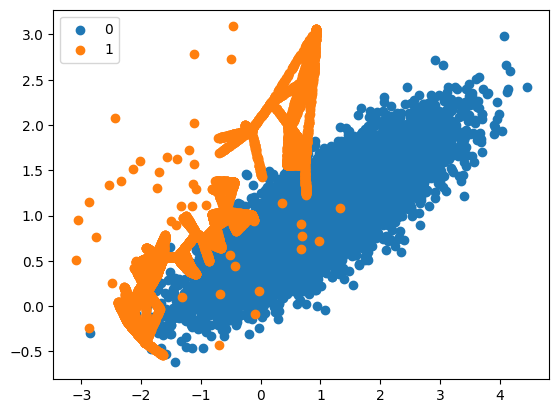

In [19]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first creates the dataset and summarizes the initial class distribution, showing a 1:100 relationship.

The Borderline-SMOTE is applied to balance the class distribution, which is confirmed with the printed class summary.

Finally, a scatter plot of the transformed dataset is created. The plot clearly shows the effect of the selective approach to oversampling. Examples along the decision boundary of the minority class are oversampled intently (orange).

The plot shows that those examples far from the decision boundary are not oversampled. This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot).

#####Borderline-SMOTE SVM
Hien Nguyen, et al. suggest using an alternative of Borderline-SMOTE where an SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary. In addition to using an SVM, the technique attempts to select regions where there are fewer examples of the minority class and tries to extrapolate towards the class boundary.

This variation can be implemented via the SVMSMOTE class from the imbalanced-learn library.

The example below demonstrates this alternative approach to Borderline SMOTE on the same imbalanced dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


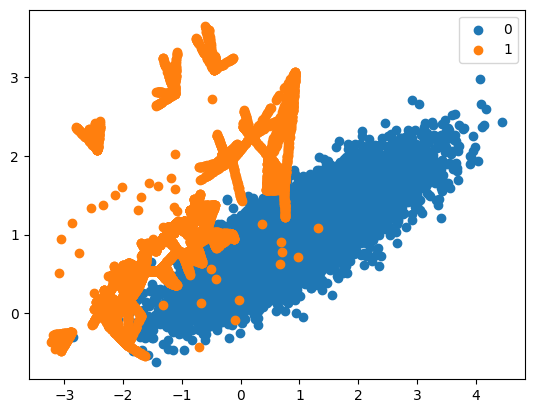

In [ ]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first summarizes the raw class distribution, then the balanced class distribution after applying Borderline-SMOTE with an SVM model.

A scatter plot of the dataset is created showing the directed oversampling along the decision boundary with the majority class.

We can also see that unlike Borderline-SMOTE, more examples are synthesized away from the region of class overlap, such as toward the top left of the plot.

#####Adaptive Synthetic Sampling (ADASYN)

Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

With online Borderline-SMOTE, a discriminative model is not created. Instead, examples in the minority class are weighted according to their density, then those examples with the lowest density are the focus for the SMOTE synthetic example generation process.

We can implement this procedure using the ADASYN class in the imbalanced-learn library.

The example below demonstrates this alternative approach to oversampling on the imbalanced binary classification dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


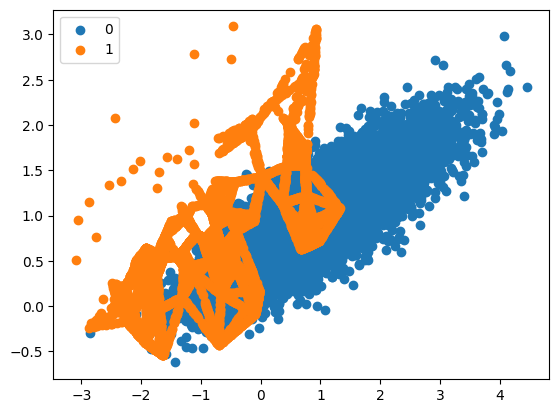

In [20]:
from imblearn.over_sampling import ADASYN
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first creates the dataset and summarizes the initial class distribution, then the updated class distribution after oversampling was performed.
A scatter plot of the transformed dataset is created. Like Borderline-SMOTE, we can see that synthetic sample generation is focused around the decision boundary as this region has the lowest density.

Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.

####How to Combine Oversampling and Undersampling for Imbalanced Classification

Resampling methods are designed to add or remove examples from the training dataset in order to change the class distribution.

Once the class distributions are more balanced, the suite of standard machine learning classification algorithms can be fit successfully on the transformed datasets.

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. Both types of resampling can be effective when used in isolation, although can be more effective when both types of methods are used together.

In this section, you will discover how to combine oversampling and undersampling techniques for imbalanced classification.

After completing this section, you will know:

* How to define a sequence of oversampling and undersampling methods to be applied to a training dataset or when evaluating a classifier model.
* How to manually combine oversampling and undersampling methods for imbalanced classification.
* How to use pre-defined and well-performing combinations of resampling methods for imbalanced classification.

#####Section Overview
This section is divided into four parts; they are:

1. Binary Test Problem and Decision Tree Model
2. Imbalanced-Learn Library
3. Manually Combine Over- and Undersampling Methods
  * Manually Combine Random Oversampling and Undersampling
  * Manually Combine SMOTE and Random Undersampling
4. Use Predefined Combinations of Resampling Methods
  * Combination of SMOTE and Tomek Links Undersampling
  * Combination of SMOTE and Edited Nearest Neighbors Undersampling

#####Binary Test Problem and Decision Tree Model
Before we dive into combinations of oversampling and undersampling methods, let’s define a synthetic dataset and model.

We can define a synthetic binary classification dataset using the make_classification() function from the scikit-learn library.

For example, we can create 10,000 examples with two input variables and a 1:100 class distribution as follows:



```
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
```

We can then create a scatter plot of the dataset via the scatter() Matplotlib function to understand the spatial relationship of the examples in each class and their imbalance.



```
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
```
Tying this together, the complete example of creating an imbalanced classification dataset and plotting the examples is listed below.


Counter({0: 9900, 1: 100})


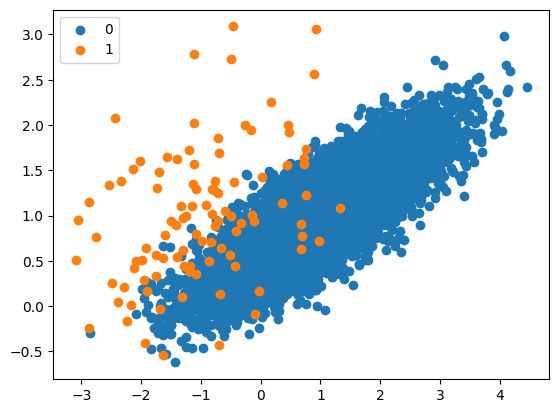

In [21]:

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Running the example first summarizes the class distribution, showing an approximate 1:100 class distribution with about 10,000 examples with class 0 and 100 with class 1.

```
Counter({0: 9900, 1: 100})
```

Next, a scatter plot is created showing all of the examples in the dataset. We can see a large mass of examples for class 0 (blue) and a small number of examples for class 1 (orange).

We can also see that the classes overlap with some examples from class 1 clearly within the part of the feature space that belongs to class 0.

We can fit a DecisionTreeClassifier model on this dataset. It is a good model to test because it is sensitive to the class distribution in the training dataset.

```
# define model
model = DecisionTreeClassifier()
```

We can evaluate the model using repeated stratified k-fold cross-validation with three repeats and 10 folds.

The ROC area under curve (AUC) measure can be used to estimate the performance of the model. It can be optimistic for severely imbalanced datasets, although it does correctly show relative improvements in model performance.

Tying this together, the example below evaluates a decision tree model on the imbalanced classification dataset.

In [22]:
# evaluates a decision tree model on the imbalanced dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


Running the example reports the average ROC AUC for the decision tree on the dataset over three repeats of 10-fold cross-validation (e.g. average over 30 different model evaluations).

**Note**: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this example, you can see that the model achieved a ROC AUC of about 0.76. This provides a baseline on this dataset, which we can use to compare different combinations of over and under sampling methods on the training dataset.

Now that we have a test problem, model, and test harness, let’s look at manual combinations of oversampling and undersampling methods.

#####Imbalanced-Learn Library

In these examples, we will use the implementations provided by the imbalanced-learn Python library.

In [23]:
import imblearn

###### Manually Combine Over- and Undersampling Methods
The imbalanced-learn Python library provides a range of resampling techniques, as well as a Pipeline class that can be used to create a combined sequence of resampling methods to apply to a dataset.

We can use the Pipeline to construct a sequence of oversampling and undersampling techniques to apply to a dataset. For example:

In [24]:
# define resampling
over = ...
under = ...
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under)])

This pipeline first applies an oversampling technique to a dataset, then applies undersampling to the output of the oversampling transform before returning the final outcome. It allows transforms to be stacked or applied in sequence on a dataset.

The pipeline can then be used to transform a dataset; for example:

```
# fit and apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)
```

Alternately, a model can be added as the last step in the pipeline.

This allows the pipeline to be treated as a model. When it is fit on a training dataset, the transforms are first applied to the training dataset, then the transformed dataset is provided to the model so that it can develop a fit.

In [25]:
# define model
model = ...
# define resampling
over = ...
under = ...
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

Recall that the resampling is only applied to the training dataset, not the test dataset.

When used in k-fold cross-validation, the entire sequence of transforms and fit is applied on each training dataset comprised of cross-validation folds. This is important as both the transforms and fit are performed without knowledge of the holdout set, which avoids data leakage. For example:

```
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
```
Now that we know how to manually combine resampling methods, let’s look at two examples.


######Manually Combine Random Oversampling and Undersampling

A good starting point for combining resampling techniques is to start with random or naive methods.

Although they are simple, and often ineffective when applied in isolation, they can be effective when combined.

Random oversampling involves randomly duplicating examples in the minority class, whereas random undersampling involves randomly deleting examples from the majority class.

As these two transforms are performed on separate classes, the order in which they are applied to the training dataset does not matter.

The example below defines a pipeline that first oversamples the minority class to 10 percent of the majority class, under samples the majority class to 50 percent more than the minority class, and then fits a decision tree model.

In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define model
model = DecisionTreeClassifier()
# define resampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

The complete example of evaluating this combination on the binary classification problem is listed below.

In [27]:
# combination of random oversampling and undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define resampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.812


Running the example evaluates the system of transforms and the model and summarizes the performance as the mean ROC AUC.

**Note**: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see a modest lift in ROC AUC performance from 0.76 with no transforms to about 0.81 with random over- and undersampling.

###### Manually Combine SMOTE and Random Undersampling
We are not limited to using random resampling methods.

Perhaps the most popular oversampling method is the Synthetic Minority Oversampling Technique, or SMOTE for short.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.

The authors of the technique recommend using SMOTE on the minority class, followed by an undersampling technique on the majority class.

We can combine SMOTE with RandomUnderSampler. Again, the order in which these procedures are applied does not matter as they are performed on different subsets of the training dataset.

The pipeline below implements this combination, first applying SMOTE to bring the minority class distribution to 10 percent of the majority class, then using RandomUnderSampler to bring the majority class down to 50 percent more than the minority class before fitting a DecisionTreeClassifier.



```
# define model
model = DecisionTreeClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
```



Running the example evaluates the system of transforms and the model and summarizes the performance as the mean ROC AUC.

In [28]:
# combination of SMOTE and random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.838


#####Use Predefined Combinations of Resampling Methods

There are combinations of oversampling and undersampling methods that have proven effective and together may be considered resampling techniques.

Two examples are the combination of SMOTE with Tomek Links undersampling and SMOTE with Edited Nearest Neighbors undersampling.

The imbalanced-learn Python library provides implementations for both of these combinations directly. Let’s take a closer look at each in turn.

######Combination of SMOTE and Tomek Links Undersampling

SMOTE is an oversampling method that synthesizes new plausible examples in the minority class. We can implement this combination using the SMOTETomek class.

```
# define resampling
resample = SMOTETomek()
```
The SMOTE configuration can be set via the “smote” argument and takes a configured SMOTE instance. The Tomek Links configuration can be set via the “tomek” argument and takes a configured TomekLinks object.

Alternately, we can configure the combination to only remove links from the majority class as described in the 2003 paper by specifying the “tomek” argument with an instance of TomekLinks with the “sampling_strategy” argument set to only undersample the ‘majority‘ class; for example:

```
# define resampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
```

We can evaluate this combined resampling strategy with a decision tree classifier on our binary classification problem.

In [29]:
# combined SMOTE and Tomek Links resampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define resampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.823


Running the example evaluates the system of transforms and the model and summarizes the performance as the mean ROC AUC.

######Combination of SMOTE and Edited Nearest Neighbors Undersampling

SMOTE may be the most popular oversampling technique and can be combined with many different undersampling techniques.

Another very popular undersampling method is the Edited Nearest Neighbors, or ENN, rule. This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed. It can be applied to all classes or just those examples in the majority class.

This includes the combinations:

* Condensed Nearest Neighbors + Tomek Links
* SMOTE + Tomek Links
* SMOTE + Edited NearestNeighbors

This can be implemented via the SMOTEENN class in the imbalanced-learn library.


```
# define resampling
resample = SMOTEENN()
```

The SMOTE configuration can be set as a SMOTE object via the “smote” argument, and the ENN configuration can be set via the EditedNearestNeighbours object via the “enn” argument. SMOTE defaults to balancing the distribution, followed by ENN that by default removes misclassified examples from all classes.

We could change the ENN to only remove examples from the majority class by setting the “enn” argument to an EditedNearestNeighbours instance with sampling_strategy argument set to ‘majority‘.

```
# define resampling
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
```

We can evaluate the default strategy (editing examples in all classes) and evaluate it with a decision tree classifier on our imbalanced dataset.

In [30]:
# combined SMOTE and Edited Nearest Neighbors resampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define resampling
resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.851


Running the example evaluates the system of transforms and the model and summarizes the performance as the mean ROC AUC.

####**How to Remove Outliers**

When modeling, it is important to clean the data sample to ensure that the observations best represent the problem.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

In this tutorial, you will discover outliers and how to identify and remove them from your machine learning dataset.

After completing this tutorial, you will know:

* That an outlier is an unlikely observation in a dataset and may have one of many causes.
* How to use simple univariate statistics like standard deviation and interquartile range to identify and remove outliers from a data sample.
* How to use an outlier detection model to identify and remove rows from a training dataset in order to lift predictive modeling performance.

#####**Section Overview**

1. What are Outliers?
2. Test Dataset
3. Standard Deviation Method
4. Interquartile Range Method
5. Automatic Outlier Detection

#####**What are Outliers?**
An outlier is an observation that is unlike the other observations.

It is rare, or distinct, or does not fit in some way.

Outliers can have many causes, such as:

* Measurement or input error.
* Data corruption.
* True outlier observation (e.g. Michael Jordan in basketball).

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data.

This does not mean that the values identified are outliers and should be removed. But, the tools described in this tutorial can be helpful in shedding light on rare events that may require a second look.

A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationship or pattern to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

#####**Test Dataset**
Before we look at outlier identification methods, let’s define a dataset we can use to test the methods.

We will generate a population 10,000 [random numbers drawn from a Gaussian distribution](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) with a mean of 50 and a standard deviation of 5.

Numbers drawn from a Gaussian distribution will have outliers. That is, by virtue of the distribution itself, there will be a few values that will be a long way from the mean, rare values that we can identify as outliers.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.

In [31]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


Running the example generates the sample and then prints the mean and standard deviation. As expected, the values are very close to the expected values.

#####**Standard Deviation Method**
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The [Gaussian distribution](https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/) has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

1. Standard Deviation from the Mean: 68%
2. Standard Deviations from the Mean: 95%
3. Standard Deviations from the Mean: 99.7%

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

Let’s make this concrete with a worked example.

Sometimes, the data is standardized first (e.g. to a Z-score with zero mean and unit variance) so that the outlier detection can be performed using standard Z-score cut-off values. This is a convenience and is not required in general, and we will perform the calculations in the original scale of the data here to make things clear.

We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

```
...
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
```
We can then identify outliers as those examples that fall outside of the defined lower and upper limits.

```
...
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
```
Alternately, we can filter out those values from the sample that are not within the defined limits.

```
...
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]
```
We can put this all together with our sample dataset prepared in the previous section.

The complete example is listed below.

In [32]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


Running the example will first print the number of identified outliers and then the number of observations that are not outliers, demonstrating how to identify and filter out outliers respectively.

So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution.

You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions.

Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

#####**Interquartile Range Method**
Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.
```
...
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
```
We can then calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.

```
...
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
```
We can then use these limits to identify the outlier values.
```
...
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
```
We can also use the limits to filter out the outliers from the dataset.
```
...
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]
```
We can tie all of this together and demonstrate the procedure on the test dataset.

The complete example is listed below.

In [33]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


Running the example first prints the identified 25th and 75th percentiles and the calculated IQR. The number of outliers identified is printed followed by the number of non-outlier observations.

The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle.

#####**Automatic Outlier Detection**
In machine learning, an approach to tackling the problem of outlier detection is [one-class classification](https://en.wikipedia.org/wiki/One-class_classification).

One-Class Classification, or OCC for short, involves fitting a model on the “normal” data and predicting whether new data is normal or an outlier/anomaly.

A one-class classifier is fit on a training dataset that only has examples from the normal class. Once prepared, the model is used to classify new examples as either normal or not-normal, i.e. outliers or anomalies.

A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space.

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

The scikit-learn library provides an implementation of this approach in the [LocalOutlierFactor class](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html).

We can demonstrate the LocalOutlierFactor method on a predictive modelling dataset.

We will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices.

The dataset can be downloaded from here:
* [Boston Housing Dataset (housing.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv)
* [Boston Housing Dataset Details (housing.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names)

Looking in the dataset, you should see that all variables are numeric.
```
0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...
```
No need to download the dataset, we will download it automatically.

First, we can load the dataset as a NumPy array, separate it into input and output variables and then split it into train and test datasets.

The complete example is listed below.

In [34]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


Running the example loads the dataset and first reports the total number of rows and columns in the dataset, then the data number of examples allocated to the train and test datasets.

It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric.

In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE).

The complete example of evaluating a linear regression model on the dataset is listed below.

In [35]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


Running the example fits and evaluates the model then reports the MAE.

Note: Your [results may vary](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/) given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the model achieved a MAE of about 3.417.

Next, we can try removing outliers from the training dataset.

The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

We can achieve this by defining the [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

```
...
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
```
We can then use these predictions to remove all outliers from the training dataset.

```
...
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
```
We can then fit and evaluate the model as per normal.

The updated example of evaluating a linear regression model with outliers deleted from the training dataset is listed below.


In [36]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


Running the example fits and evaluates the linear regression model with outliers deleted from the training dataset.

Note: [Your results may vary](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/) given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Firstly, we can see that the number of examples in the training dataset has been reduced from 339 to 305, meaning 34 rows containing outliers were identified and deleted.

We can also see a reduction in MAE from about 3.417 by a model fit on the entire training dataset, to about 3.356 on a model fit on the dataset with outliers removed.



###Data Preparation for Columns

This group is for data preparation techniques that add or remove columns of data.

In machine learning, columns are often referred to as variables or features.

These techniques are often required to either reduce the complexity (dimensionality) of a prediction problem or to unpack compound input variables or complex interactions between features.

The main class of techniques that come to mind are feature selection techniques.

This includes techniques that use statistics to score the relevance of input variables to the target variable based on the data type of each.

#### Ejercicio:

Para esta sección, deberá seguir uno de los siguientes tutoriales y crear un notebook con los resultados de su uso en esta sección. Cuide los espacios del notebook para el índice (Se controlan con los # en los títulos):

* [Choose a Feauture Selection Method for Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
* [Recursive Feauture Elimination](https://machinelearningmastery.com/rfe-feature-selection-in-python/)
* [Feature Importance With Python](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
* [Polynomial Feature Transforms](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/)
* [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)


#####  Resultados del Tema Seleccionado

In [37]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.2.2


In [39]:
#RFE con scikit-learn
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.031)


In [40]:
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


In [41]:
#RFE para regresión
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [42]:

# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -26.981 (2.340)


In [43]:
# make a regression prediction with an RFE pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


>2 0.718 (0.043)
>3 0.820 (0.036)
>4 0.873 (0.032)
>5 0.888 (0.032)
>6 0.891 (0.026)
>7 0.888 (0.026)
>8 0.884 (0.032)
>9 0.889 (0.026)


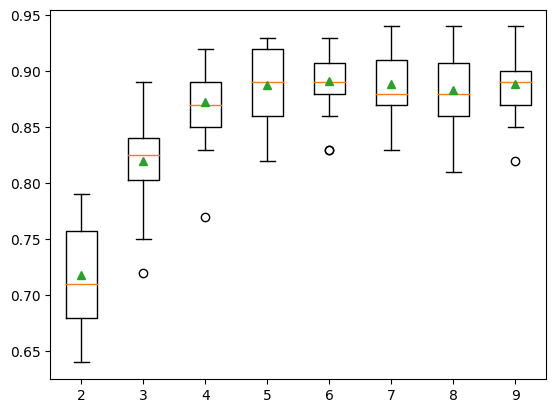

In [45]:
#Hiperparámetros RFE
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [47]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.887 (0.024)


In [48]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000


>lr 0.889 (0.030)
>per 0.839 (0.041)
>cart 0.883 (0.033)
>rf 0.860 (0.036)
>gbm 0.888 (0.031)


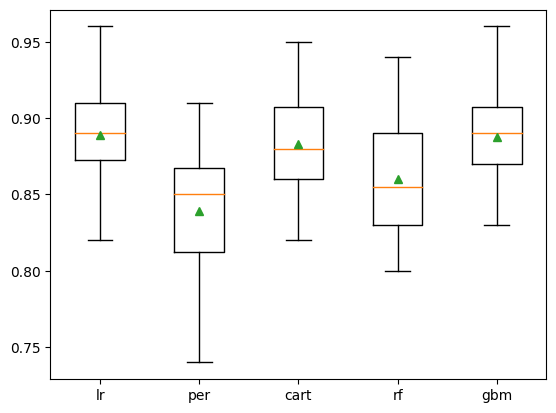

In [49]:
#uso de diferentes algoritmos base
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###Data Preparation for Values

This group is for data preparation techniques that change the raw values in the data.

These techniques are often required to meet the expectations or requirements of specific machine learning algorithms.

The main class of techniques that come to mind is data transforms that change the scale or distribution of input variables.

For example, data transforms such as standardization and normalization change the scale of numeric input variables. Data transforms like ordinal encoding change the type of categorical input variables.

There are also many data transforms for changing the distribution of input variables.

For example, discretization or binning change the distribution of numerical input variables into categorical variables with an ordinal ranking.

#### Ejercicio:

Para esta sección, deberá seguir uno de los siguientes tutoriales y crear un notebook con los resultados de su uso en esta sección. Cuide los espacios del notebook para el índice (Se controlan con los # en los títulos):

* [Discretization Transforms](https://machinelearningmastery.com/discretization-transforms-for-machine-learning/)
* [Power Transforms](https://machinelearningmastery.com/power-transforms-with-scikit-learn/)
* [Quantile Transforms](https://machinelearningmastery.com/quantile-transforms-for-machine-learning/)
* [Statistical Imputation for Missing Values](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/)

#####  Resultados del Tema Seleccionado

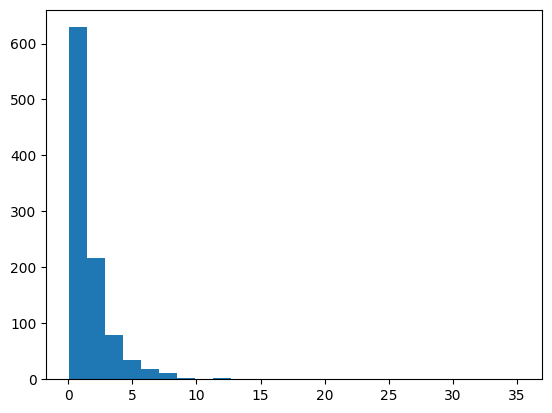

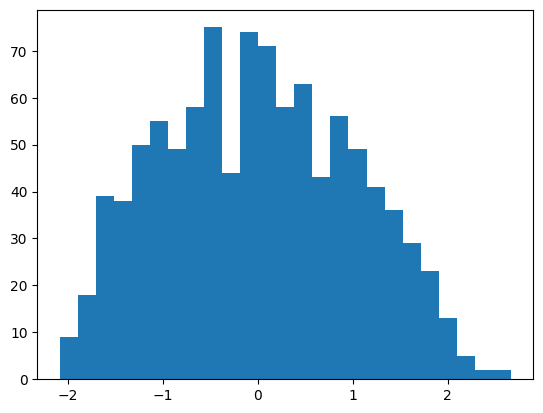

In [50]:
#Power Transforms
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

(208, 61)
               0           1           2           3           4           5    
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000  \
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50   
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000  \
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

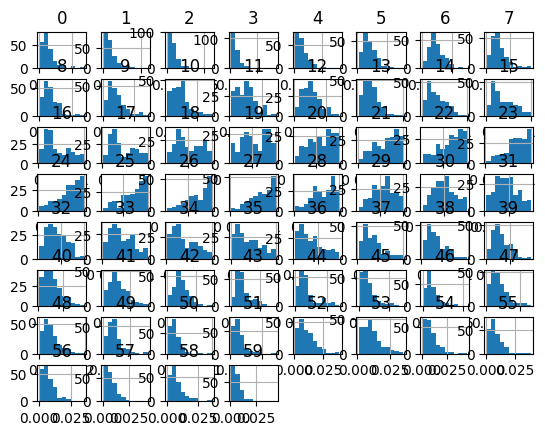

In [51]:
#Sonar Dataset
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [64]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [65]:
#Box-Cox Transform
# visualize a box-cox transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

ValueError: The Box-Cox transformation can only be applied to strictly positive data

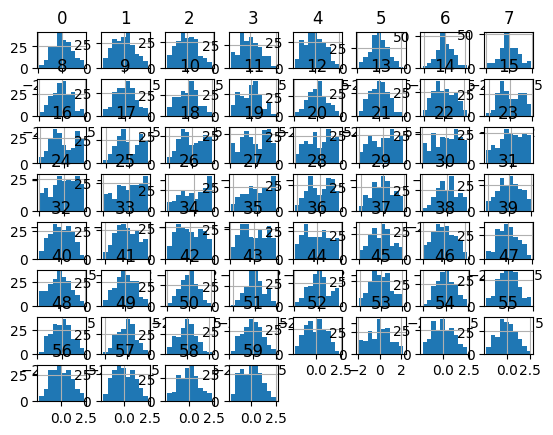

In [66]:
#solucion a el problema de datos estrictamente posotivos 
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [67]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


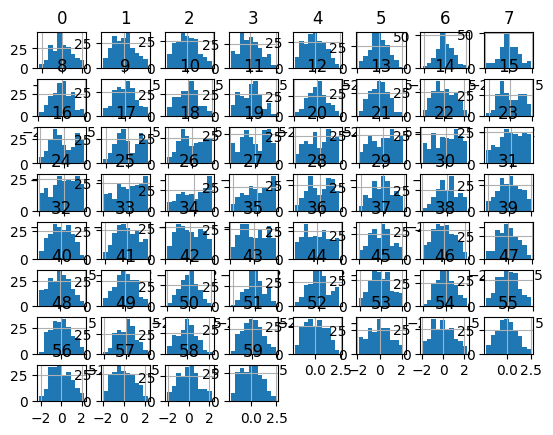

In [68]:
#Yeo-Johnson Transform
# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [69]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


In [70]:
#con datos estandarizados 
# evaluate knn on the yeo-johnson standardized sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


###Data Preparation for Columns + Values

This group is for data preparation techniques that change both the number of columns and the values in the data.

The main class of techniques that this brings to mind are dimensionality reduction techniques that specifically reduce the number of columns and the scale and distribution of numerical input variables.

This includes matrix factorization methods used in linear algebra as well as manifold learning algorithms used in high-dimensional statistics.

#### Ejercicio:

Para esta sección, deberá seguir el siguiente tutorial y crear un notebook con los resultados de su uso en esta sección. Cuide los espacios del notebook para el índice (Se controlan con los # en los títulos):

* [Introduction to Dimensionality Reduction](https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/)

#####  Resultados del Tema Seleccionado

###Data Preparation for Rows + Values

This group is for data preparation techniques that change both the number of rows and the values in the data.

I have not explicitly considered data transforms of this type before, but it falls out of the framework as defined.

A group of methods that come to mind are clustering algorithms where all or subsets of rows of data in the dataset are replaced with data samples at the cluster centers, referred to as cluster centroids.

Related might be replacing rows with exemplars (aggregates of rows) taken from specific machine learning algorithms, such as support vectors from a support vector machine, or the codebook vectors taken from a learning vector quantization.

Naturally, these aggregate rows are simply added to the dataset rather than replacing rows, then they would naturally fit into the “Data Preparation for Rows” group described above.

#Summary
In this tutorial, you discovered a framework for systematically grouping data preparation techniques based on their effect on raw data.

Specifically, you learned:

1. The challenge and overwhelm of framing data preparation as yet an additional hyperparameter to tune in the machine learning modeling pipeline.

2. A framework that defines five groups of data preparation techniques to consider.

3. Examples of data preparation techniques that belong to each group that can be evaluated on your predictive modeling project.